In [1]:
import pandas as pd
import numpy as np
import scipy.stats 
from sklearn.model_selection import train_test_split 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [2]:
df=pd.read_csv("/content/train_F3fUq2S.csv")
df_test=pd.read_csv("/content/test_Bk2wfZ3.csv")
print("size of train data",df.shape)
print("size of test data",df_test.shape)

size of train data (1888, 22)
size of test data (762, 21)


In [3]:
df.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         1888 non-null   int64  
 1   sender              1888 non-null   int64  
 2   subject_len         1888 non-null   int64  
 3   body_len            1888 non-null   int64  
 4   mean_paragraph_len  1888 non-null   int64  
 5   day_of_week         1888 non-null   int64  
 6   is_weekend          1888 non-null   int64  
 7   times_of_day        1888 non-null   object 
 8   category            1888 non-null   int64  
 9   product             1888 non-null   int64  
 10  no_of_CTA           1888 non-null   int64  
 11  mean_CTA_len        1888 non-null   int64  
 12  is_image            1888 non-null   int64  
 13  is_personalised     1888 non-null   int64  
 14  is_quote            1888 non-null   int64  
 15  is_timer            1888 non-null   int64  
 16  is_emo

In [5]:
#Finding categorical variable with number of unique category
no_of_category={col : len(list(df[col].unique())) for col in df.columns }
no_of_category

{'body_len': 1568,
 'campaign_id': 1888,
 'category': 16,
 'click_rate': 1810,
 'day_of_week': 7,
 'is_discount': 2,
 'is_emoticons': 6,
 'is_image': 6,
 'is_personalised': 2,
 'is_price': 8,
 'is_quote': 7,
 'is_timer': 1,
 'is_urgency': 2,
 'is_weekend': 2,
 'mean_CTA_len': 79,
 'mean_paragraph_len': 121,
 'no_of_CTA': 40,
 'product': 43,
 'sender': 12,
 'subject_len': 170,
 'target_audience': 17,
 'times_of_day': 3}

In [6]:
for col in df.columns:
  df[col].value_counts()
  sub_df=df.groupby([col])["click_rate"].describe()[["count","mean","std"]]
  print(col)
  print(sub_df.head(20))

campaign_id
             count      mean  std
campaign_id                      
1              1.0  0.103079  NaN
2              1.0  0.700000  NaN
3              1.0  0.002769  NaN
4              1.0  0.010868  NaN
5              1.0  0.142826  NaN
6              1.0  0.500000  NaN
7              1.0  0.457143  NaN
8              1.0  0.166998  NaN
9              1.0  0.029233  NaN
10             1.0  0.003058  NaN
11             1.0  0.117600  NaN
12             1.0  0.225627  NaN
13             1.0  0.006463  NaN
14             1.0  0.006677  NaN
15             1.0  0.014610  NaN
16             1.0  0.206349  NaN
17             1.0  0.133638  NaN
18             1.0  0.009667  NaN
19             1.0  0.005418  NaN
20             1.0  0.003031  NaN
sender
         count      mean       std
sender                            
0          3.0  0.009385  0.002806
1          1.0  0.002660       NaN
2          1.0  0.070796       NaN
3       1559.0  0.042660  0.083053
6         22.0  0.01145

In [7]:
num_col=['body_len','mean_paragraph_len','subject_len']
cat_cluster=["category",'is_emoticons','is_image','mean_CTA_len','no_of_CTA','product','sender','target_audience',"day_of_week"]
cat_bin_col=['is_discount','is_personalised','is_urgency','is_weekend']
cat_target=['is_quote','times_of_day']
cat_del=['is_price','is_timer']

In [8]:
df=df.drop(cat_del,axis=1)
df_test=df_test.drop(cat_del,axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


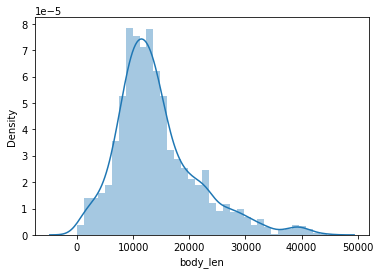

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


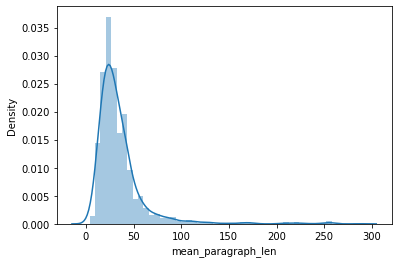

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


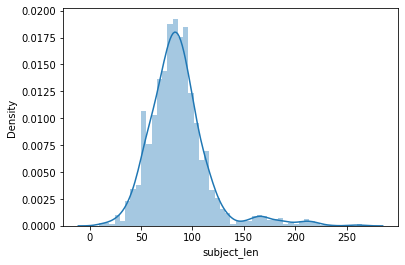

In [9]:
for i in num_col:
  sns.distplot(df[i])
  plt.show()

In [10]:
df['mean_paragraph_len'].min()

4

Data Bining

In [11]:
# a=df.copy()

# # df['bin_mean_paragraph_len'] = pd.cut(df['mean_paragraph_len'] , bins=[  4.,10. ,20., 30., 40.,50., 70.,80., 286.], labels=[1,2,3,4,5,6,7,8], include_lowest=True)
# # df_test['bin_mean_paragraph_len'] = pd.cut(df_test['mean_paragraph_len'] , bins=[  4.,10. ,20., 30., 40.,50., 70.,80., 286.], labels=[1,2,3,4,5,6,7,8], include_lowest=True)
# # plt.hist(df['bin_mean_paragraph_len'], bins=8)
# # plt.show()
# # plt.hist(df_test['bin_mean_paragraph_len'], bins=8)
# # plt.show()





In [12]:
df_test.shape

(762, 19)

Clustering category 
1.category
2.is_emoticons
3.is_image
4.mean_CTA_len
5.no_of_CTA
6.product
7.sender
8.target_audience' bold text

















,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
0,1.0,0.006441,0.082039,0.006441,0.006441,0.006441,0.006441,0.006441
1,200.0,0.039403,0.080779,0.001152,0.004583,0.009235,0.037703,0.692308
2,166.0,0.079360,0.149368,0.000000,0.005846,0.015736,0.065991,0.700000
3,6.0,0.003699,0.002566,0.000915,0.002715,0.003202,0.003636,0.008540
4,6.0,0.011947,0.007202,0.005089,0.007166,0.009445,0.015294,0.024053


category cluster
   category  click_rate_mean  category cluster
0         0         0.006441                 2
1         1         0.039403                 0
2         2         0.079360                 3
3         3         0.003699                 2
4         4         0.011947                 2


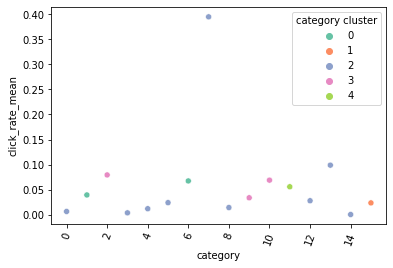

,count,mean,std,min,25%,50%,75%,max
is_emoticons,,,,,,,,
0,1626.0,0.045905,0.089443,0.00000,0.005714,0.011984,0.040276,0.897959
1,172.0,0.011607,0.013622,0.00000,0.004507,0.007063,0.011762,0.086957
2,54.0,0.037820,0.049866,0.00000,0.004593,0.009543,0.067243,0.165689
3,30.0,0.009313,0.007845,0.00000,0.004553,0.006410,0.010765,0.037916
4,4.0,0.022907,0.010678,0.01168,0.017164,0.021455,0.027197,0.037037


is_emoticons cluster
   is_emoticons  click_rate_mean  is_emoticons cluster
0             0         0.045905                     1
1             1         0.011607                     0
2             2         0.037820                     4
3             3         0.009313                     2
4             4         0.022907                     3


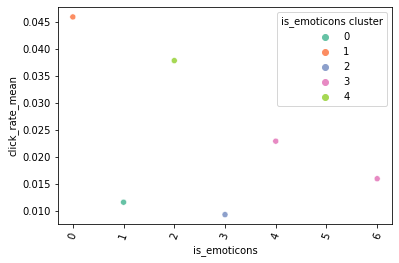

,count,mean,std,min,25%,50%,75%,max
is_image,,,,,,,,
0,716.0,0.044411,0.082327,0.000000,0.005490,0.011744,0.041926,0.700000
1,685.0,0.041492,0.089344,0.000000,0.005329,0.009866,0.030845,0.897959
2,442.0,0.037510,0.077324,0.000000,0.005477,0.012017,0.031852,0.692521
3,39.0,0.053530,0.103341,0.000000,0.005046,0.016700,0.069217,0.600683
4,2.0,0.005849,0.001199,0.005001,0.005425,0.005849,0.006273,0.006697


is_image cluster
   is_image  click_rate_mean  is_image cluster
0         0         0.044411                 4
1         1         0.041492                 0
2         2         0.037510                 2
3         3         0.053530                 3
4         4         0.005849                 1


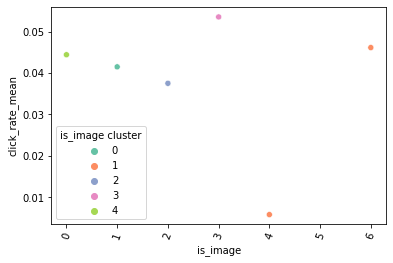

,count,mean,std,min,25%,50%,75%,max
mean_CTA_len,,,,,,,,
0,10.0,0.020199,0.047715,0.000000,0.000000,0.000923,0.011437,0.153846
1,1.0,0.007407,0.068781,0.007407,0.007407,0.007407,0.007407,0.007407
4,2.0,0.145617,0.056868,0.105405,0.125511,0.145617,0.165723,0.185829
7,1.0,0.040923,0.068781,0.040923,0.040923,0.040923,0.040923,0.040923
10,14.0,0.030905,0.037952,0.000000,0.000784,0.011830,0.060608,0.111111


mean_CTA_len cluster
   mean_CTA_len  click_rate_mean  mean_CTA_len cluster
0             0         0.020199                     1
1             1         0.007407                     1
2             4         0.145617                     1
3             7         0.040923                     1
4            10         0.030905                     4


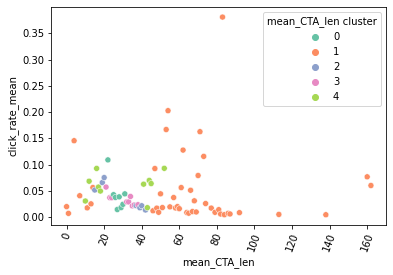

,count,mean,std,min,25%,50%,75%,max
no_of_CTA,,,,,,,,
0,115.0,0.155489,0.161491,0.0,0.022588,0.112245,0.197389,0.700000
1,148.0,0.083938,0.142655,0.0,0.008942,0.023297,0.084692,0.692521
2,364.0,0.037628,0.083546,0.0,0.004980,0.009696,0.032100,0.897959
3,445.0,0.033510,0.050860,0.0,0.006359,0.012185,0.035601,0.279279
4,331.0,0.026989,0.046662,0.0,0.005330,0.009399,0.026345,0.354545


no_of_CTA cluster
   no_of_CTA  click_rate_mean  no_of_CTA cluster
0          0         0.155489                  2
1          1         0.083938                  2
2          2         0.037628                  1
3          3         0.033510                  4
4          4         0.026989                  1


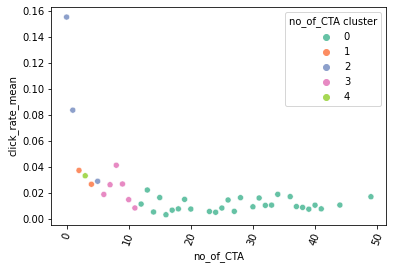

,count,mean,std,min,25%,50%,75%,max
product,,,,,,,,
0,1.0,0.006441,0.077457,0.006441,0.006441,0.006441,0.006441,0.006441
1,108.0,0.019037,0.021949,0.000000,0.005863,0.010174,0.022492,0.121212
2,1.0,0.005209,0.077457,0.005209,0.005209,0.005209,0.005209,0.005209
3,8.0,0.093073,0.231856,0.002454,0.007284,0.012611,0.017306,0.666667
4,1.0,0.004088,0.077457,0.004088,0.004088,0.004088,0.004088,0.004088


product cluster
   product  click_rate_mean  product cluster
0        0         0.006441                0
1        1         0.019037                4
2        2         0.005209                0
3        3         0.093073                0
4        4         0.004088                0


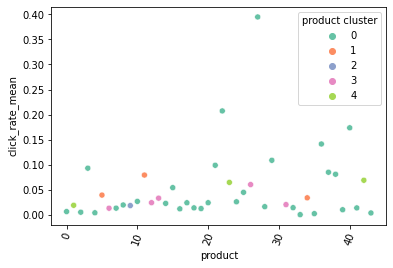

,count,mean,std,min,25%,50%,75%,max
sender,,,,,,,,
0,3.0,0.009385,0.002806,0.007479,0.007774,0.008068,0.010338,0.012607
1,1.0,0.002660,0.045836,0.002660,0.002660,0.002660,0.002660,0.002660
2,1.0,0.070796,0.045836,0.070796,0.070796,0.070796,0.070796,0.070796
3,1559.0,0.042660,0.083053,0.000000,0.005375,0.010457,0.036018,0.700000
6,22.0,0.011454,0.008106,0.001657,0.005516,0.009669,0.015865,0.036000


sender cluster
   sender  click_rate_mean  sender cluster
0       0         0.009385               0
1       1         0.002660               0
2       2         0.070796               0
3       3         0.042660               1
4       6         0.011454               4


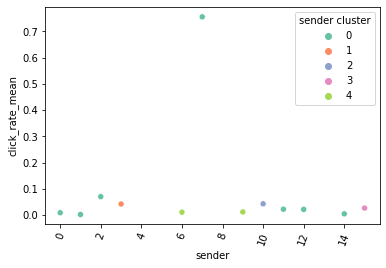

,count,mean,std,min,25%,50%,75%,max
target_audience,,,,,,,,
0,3.0,0.009245,0.009486,0.001261,0.004002,0.006742,0.013237,0.019732
1,50.0,0.024340,0.039719,0.001556,0.005319,0.011946,0.025305,0.234694
2,20.0,0.029384,0.042213,0.001207,0.003037,0.015637,0.028990,0.162791
3,9.0,0.044939,0.043905,0.008839,0.013490,0.030083,0.048769,0.127820
4,10.0,0.015234,0.017484,0.001213,0.005188,0.010035,0.013298,0.058355


target_audience cluster
   target_audience  click_rate_mean  target_audience cluster
0                0         0.009245                        0
1                1         0.024340                        3
2                2         0.029384                        0
3                3         0.044939                        0
4                4         0.015234                        0


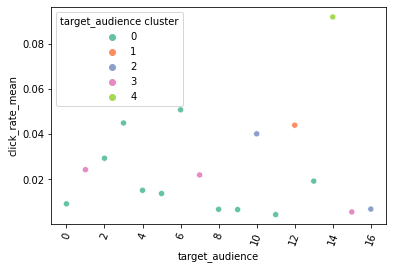

,count,mean,std,min,25%,50%,75%,max
day_of_week,,,,,,,,
0,208.0,0.034590,0.071978,0.0,0.004619,0.009232,0.024778,0.500000
1,295.0,0.036857,0.080144,0.0,0.005267,0.010261,0.033546,0.692521
2,333.0,0.033967,0.081805,0.0,0.005182,0.009456,0.026493,0.897959
3,346.0,0.041123,0.073969,0.0,0.005207,0.009897,0.035536,0.526316
4,329.0,0.037786,0.080343,0.0,0.005219,0.010077,0.023917,0.500000


day_of_week cluster
   day_of_week  click_rate_mean  day_of_week cluster
0            0         0.034590                    1
1            1         0.036857                    0
2            2         0.033967                    2
3            3         0.041123                    2
4            4         0.037786                    2


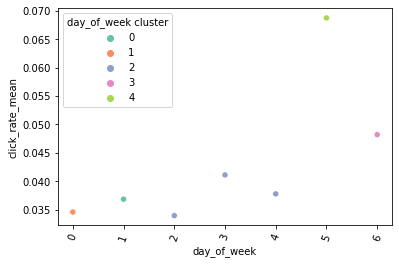

In [13]:
df_updated=df.copy()
df_updated_test=df_test.copy()

feature={}
feature_clus_name={}
feature_cluster={}
feature_df={}
for col in df[cat_cluster].columns:
  feature[col]= df.groupby([col])["click_rate"].describe()
  feature[col].fillna(feature[col].mean(),inplace=True)
  display(feature[col].head())
  feature_cluster[col] = KMeans(n_clusters=5, random_state = 927)
  feature_cluster[col].fit(feature[col])
  feature_clus_name[col]= col+" cluster"
  print(feature_clus_name[col])
  feature_df[col]=pd.DataFrame(zip(list(feature[col].index),list(feature[col].loc[:,'mean']),list(feature_cluster[col].labels_)),
                               columns = [col,'click_rate_mean',feature_clus_name[col]])
  print(feature_df[col].head())
  sns.scatterplot(data = feature_df[col], x=col,y = 'click_rate_mean', hue=feature_clus_name[col],palette=sns.color_palette("Set2",5))
  plt.xticks(rotation=70)
  plt.show()
  df_updated = pd.merge(left = df_updated.reset_index(), right = feature_df[col][[col,feature_clus_name[col]]], how='left', on =col).set_index('index')
  df_updated_test = pd.merge(left = df_updated_test.reset_index(), right = feature_df[col][[col,feature_clus_name[col]]], how='left', on =col).set_index('index')
  #drop column
  df_updated=df_updated.drop(col,axis=1)
  df_updated_test=df_updated_test.drop(col,axis=1)

In [14]:
#segregate
x_train=df_updated.drop(["campaign_id","click_rate"],axis=1)
y_train=df_updated["click_rate"]
x_test=df_updated_test.drop(["campaign_id"],axis=1)
print("x_train",x_train.shape,"y_train",y_train.shape,"x_test",x_test.shape)

x_train (1888, 18) y_train (1888,) x_test (762, 18)


In [15]:
x_test.head(100)

,subject_len,body_len,mean_paragraph_len,is_weekend,times_of_day,is_personalised,is_quote,is_discount,is_urgency,category cluster,is_emoticons cluster,is_image cluster,mean_CTA_len cluster,no_of_CTA cluster,product cluster,sender cluster,target_audience cluster,day_of_week cluster
index,,,,,,,,,,,,,,,,,,
0,61,12871,11,1,Noon,0,0,0,0,0,0.0,0,2.0,4.0,3.0,1.0,4,3
1,54,2569,256,1,Morning,0,0,0,0,3,1.0,4,0.0,2.0,1.0,1.0,2,4
2,88,1473,78,0,Evening,0,1,0,0,3,1.0,0,0.0,2.0,1.0,1.0,2,2
3,88,1473,78,0,Evening,0,1,0,0,3,1.0,0,0.0,2.0,1.0,1.0,2,2
4,78,9020,29,0,Noon,0,0,0,0,0,1.0,4,2.0,1.0,3.0,1.0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,115,13440,8,0,Evening,0,0,0,0,0,1.0,1,2.0,1.0,3.0,1.0,2,2
96,67,17788,23,1,Noon,0,1,0,1,1,1.0,0,0.0,4.0,2.0,1.0,1,4
97,88,14864,20,1,Noon,0,2,0,0,3,1.0,0,2.0,1.0,1.0,1.0,2,4


Numerical

body_len
skew 1.1380280133082634


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


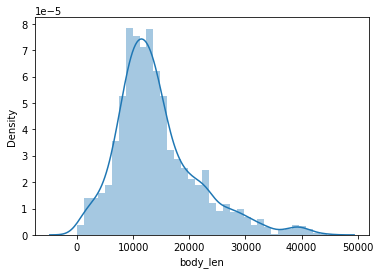

mean_paragraph_len
skew 4.301295285166428


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


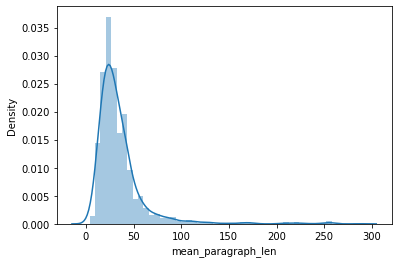

subject_len
skew 1.6431073764833588


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


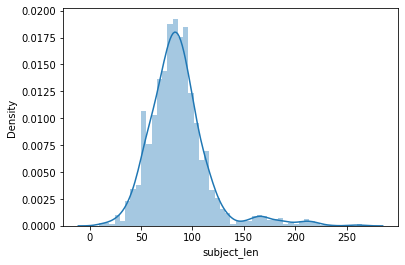

In [16]:
for col in x_train[num_col].columns:
  print(col)
  print("skew",scipy.stats.skew(x_train[col]))
  sns.distplot(x_train[col])
  plt.show()
    

body_len
distribution after log transform


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


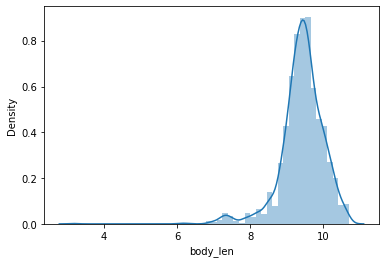

skew -1.6371000249123344
mean_paragraph_len
distribution after log transform


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


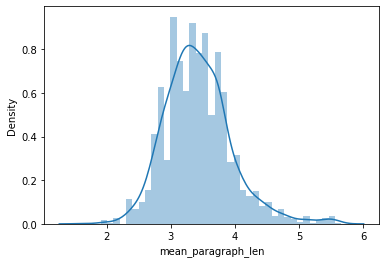

skew 0.7742298298710231
subject_len
distribution after log transform


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


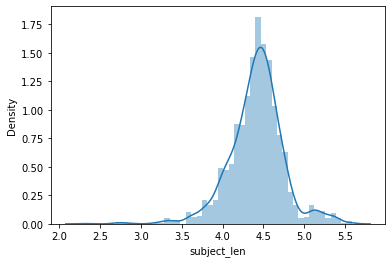

skew -0.44003533142768625


In [17]:
for col in x_train[num_col].columns:
  print(col)
  print("distribution after log transform")
  a=abs(np.log1p(x_train[col]))
  sns.distplot(a)
  plt.show()
  print("skew",scipy.stats.skew(a))
  x_train[col]=abs(np.log1p(x_train[col]))
  x_test[col]=abs(np.log1p(x_test[col]))

In [18]:
object_cols=['is_discount','is_personalised','is_urgency',"times_of_day",
             'is_weekend','is_quote',
             'category cluster',
             'is_emoticons cluster',
 'is_image cluster',
 'mean_CTA_len cluster',
 'no_of_CTA cluster',
 'product cluster',
 'sender cluster',
 'target_audience cluster','day_of_week cluster']

object_cols


['is_discount',
 'is_personalised',
 'is_urgency',
 'times_of_day',
 'is_weekend',
 'is_quote',
 'category cluster',
 'is_emoticons cluster',
 'is_image cluster',
 'mean_CTA_len cluster',
 'no_of_CTA cluster',
 'product cluster',
 'sender cluster',
 'target_audience cluster',
 'day_of_week cluster']

In [19]:
x_test.columns

Index(['subject_len', 'body_len', 'mean_paragraph_len', 'is_weekend',
       'times_of_day', 'is_personalised', 'is_quote', 'is_discount',
       'is_urgency', 'category cluster', 'is_emoticons cluster',
       'is_image cluster', 'mean_CTA_len cluster', 'no_of_CTA cluster',
       'product cluster', 'sender cluster', 'target_audience cluster',
       'day_of_week cluster'],
      dtype='object')

One Hot Encoding

In [20]:
# One Hot Encoding for Other Columns
from sklearn.preprocessing import OneHotEncoder, RobustScaler, PolynomialFeatures,StandardScaler
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols= pd.DataFrame(OH_encoder.fit_transform(x_train[object_cols]))
OH_cols.index = x_train.index
OH_cols.columns = OH_encoder.get_feature_names(object_cols)
x_train = x_train.drop(object_cols, axis=1)
x_train = pd.concat([x_train, OH_cols], axis=1)

OH_cols = pd.DataFrame(OH_encoder.transform(x_test[object_cols]))
OH_cols.index = x_test.index
OH_cols.columns = OH_encoder.get_feature_names(object_cols)
x_test = x_test.drop(object_cols, axis=1)
x_test = pd.concat([x_test, OH_cols], axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Scaling

In [21]:
from sklearn.preprocessing import MinMaxScaler
for col in x_train[num_col]:
  scaler = MinMaxScaler()
  x_train[col] = scaler.fit_transform(x_train[[col]])
  x_test[col] = scaler.transform(x_test[[col]])




In [22]:
# for col in x_train[num_col]:
#         scaler = RobustScaler()
#         x_train[col] = scaler.fit_transform(x_train[[col]])
#         x_test[col] = scaler.transform(x_test[[col]])

In [23]:
# log_target

Feature selection

In [24]:
from sklearn.feature_selection import mutual_info_regression
mi = mutual_info_regression(X = x_train, y = y_train)
mi_df = pd.DataFrame(list(zip(x_train.columns,mi)), columns =['Feature','Mutual Info'])
mi_df = mi_df.sort_values('Mutual Info',ascending=False)



In [25]:
low_mi_df = mi_df[abs(mi_df['Mutual Info']) == 0]
filter_feature = sorted(list(low_mi_df['Feature']))
print("Number of low correlated features dropped: " + str(len(filter_feature)))
x_train = x_train.drop(filter_feature,axis=1)
x_test = x_test.drop(filter_feature,axis=1)

Number of low correlated features dropped: 7


Model Selection

In [26]:
 pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 


**Hyperparameter optimization**

In [33]:
from sklearn.linear_model import BayesianRidge, HuberRegressor, Ridge, OrthogonalMatchingPursuit
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm
from lightgbm import LGBMRegressor 
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold, cross_val_score,GridSearchCV
from sklearn.metrics import r2_score
model=CatBoostRegressor()
param = {'n_estimators': [1000,5000,10000,15000],
        'loss_function': ['RMSE']}




In [34]:
clf=GridSearchCV(model,param,cv=5)

In [35]:
clf.fit(x_train,y_train)



Streaming output truncated to the last 5000 lines.
5000:	learn: 0.0256887	total: 11s	remaining: 11s
5001:	learn: 0.0256838	total: 11s	remaining: 11s
5002:	learn: 0.0256788	total: 11s	remaining: 11s
5003:	learn: 0.0256729	total: 11s	remaining: 11s
5004:	learn: 0.0256680	total: 11s	remaining: 11s
5005:	learn: 0.0256665	total: 11s	remaining: 11s
5006:	learn: 0.0256619	total: 11s	remaining: 11s
5007:	learn: 0.0256617	total: 11s	remaining: 11s
5008:	learn: 0.0256574	total: 11s	remaining: 11s
5009:	learn: 0.0256524	total: 11s	remaining: 11s
5010:	learn: 0.0256471	total: 11s	remaining: 11s
5011:	learn: 0.0256447	total: 11s	remaining: 11s
5012:	learn: 0.0256418	total: 11s	remaining: 11s
5013:	learn: 0.0256368	total: 11s	remaining: 11s
5014:	learn: 0.0256367	total: 11s	remaining: 11s
5015:	learn: 0.0256324	total: 11s	remaining: 11s
5016:	learn: 0.0256287	total: 11s	remaining: 11s
5017:	learn: 0.0256262	total: 11s	remaining: 11s
5018:	learn: 0.0256219	total: 11s	remaining: 11s
5019:	learn: 0.025

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x7f8bd379fbd0>,
             param_grid={'loss_function': ['RMSE'],
                         'n_estimators': [1000, 5000, 10000, 15000]})

In [38]:
clf.best_estimator_.score


<bound method CatBoostRegressor.score of <catboost.core.CatBoostRegressor object at 0x7f8bd36a7990>>

In [43]:
clf.cv_results_

{'mean_fit_time': array([ 2.95808115, 11.82468858, 23.53784695, 35.00328069]),
 'mean_score_time': array([0.00872574, 0.00864449, 0.01210947, 0.01492028]),
 'mean_test_score': array([-0.1021334 , -0.07224115, -0.07004245, -0.07588547]),
 'param_loss_function': masked_array(data=['RMSE', 'RMSE', 'RMSE', 'RMSE'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[1000, 5000, 10000, 15000],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'loss_function': 'RMSE', 'n_estimators': 1000},
  {'loss_function': 'RMSE', 'n_estimators': 5000},
  {'loss_function': 'RMSE', 'n_estimators': 10000},
  {'loss_function': 'RMSE', 'n_estimators': 15000}],
 'rank_test_score': array([4, 2, 1, 3], dtype=int32),
 'split0_test_score': array([0.28948746, 0.2856136 , 0.28274206, 0.28923034]),
 'split1_test_score': array([0.14060073, 0.23209219, 0.22723059, 0

In [42]:
clf.best_estimator_

In [ ]:
# model()

In [ ]:
# model.fit(x_train,y_train)
# r2_score(y_train,model.predict(x_train))

In [ ]:
# r2_score(y_train,model.predict(x_train))

Evaluation

In [ ]:
# results1 = {}

# for name, model in models.items():
#     result = cross_val_score(model, x_train, y_train,scoring="r2",cv=5)
#     results1[name] = result

In [ ]:
# for name, model in models.items():
#    print("----------\n" + name)
#    print("result", r2_score(y_train,model.predict(x_train)))

Bining

In [ ]:
# for name, model in models.items():
#    print("----------\n" + name)
#    print("result", r2_score(y_train,model.predict(x_train)))

In [ ]:
# for name, result in results1.items():
#     print("----------\n" + name)
#     print(result)
#     print(np.mean(result))

In [ ]:
# x_test.shape

Robust scaler result WIN

In [ ]:
# for name, result in results1.items():
#     print("----------\n" + name)
#     print(result)

In [ ]:
# for name, model in models.items():
#   model.fit(x_train,y_train)

In [ ]:
np.mean([0.62183708,0.70706771,0.43555855,0.61366749,0.13996545])

Standard Scaler result

In [ ]:
# for name, result in results1.items():
#     print("----------\n" + name)
#     print(result)

In [ ]:
# (
#     (0.1 * models['gbr'].predict(x_test)) +
#     (0.25 * models['br'].predict(x_test)) +
#     (0.25 * models['ridge'].predict(x_test))+
#     (0.2 * models['lgbm'].predict(x_test))+
#     (0.2 * models['catboost'].predict(x_test)))

In [ ]:
# submission=pd.read_csv("/content/sample_submission_LJ2N3ZQ.csv")

In [ ]:
# submission.head()

In [ ]:
submission_test

In [29]:
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score
# model=CatBoostRegressor(loss_function='RMSE',n_estimators=15000, verbose = 0)
# cross_val_score(model, x_train, y_train,scoring="r2",cv=3)


# model=CatBoostRegressor()
# r2_score(y_train,model.predict(x_train))
# model.fit(x_train,y_train)
# r2_score(y_train,model.predict(x_train))
# y_pred=model.predict(x_test)

In [44]:
br_params = {
    'n_iter': 304,
    'tol': 0.16864712769300896,
    'alpha_1': 5.589616542154059e-07,
    'alpha_2': 9.799343618469923,
    'lambda_1': 1.7735725582463822,
    'lambda_2': 3.616928181181732e-06
}

lightgbm_params = {
    'num_leaves': 39,
    'max_depth': 2,
    'learning_rate': 0.13705339989856127,
    'n_estimators': 273
}

ridge_params = {
    'alpha': 631.1412445239156
}

models = {'gbr':GradientBoostingRegressor(),
          'br':BayesianRidge(**br_params),
          'ridge':Ridge(**ridge_params),
          'lgbm':LGBMRegressor(**lightgbm_params),
          'catboost':CatBoostRegressor(loss_function='RMSE',n_estimators=1000, verbose = 0)}




In [45]:
for name, model in models.items():
  model.fit(x_train,y_train)

In [46]:
results1 = {}

for name, model in models.items():
    result = r2_score(y_train,model.predict(x_train))
    results1[name] = result

In [47]:
for name, result in results1.items():
    print("----------\n" + name)
    print(result)

----------
gbr
0.6840121732112487
----------
br
0.18940380168799675
----------
ridge
0.12549227664907414
----------
lgbm
0.5584799566510481
----------
catboost
0.9332344196984217


In [48]:
y_pred=(
    (0.18 * models['gbr'].predict(x_train)) +
    (0 * models['br'].predict(x_train)) +
    (0 * models['ridge'].predict(x_train))+
    (0.01 * models['lgbm'].predict(x_train))+
    (0.81 * models['catboost'].predict(x_train)))
r2_score(y_train,y_pred)

0.9090051034073414

In [49]:
y_pred=(
    (0.18 * models['gbr'].predict(x_test)) +
    (0.0 * models['br'].predict(x_test)) +
    (0.0 * models['ridge'].predict(x_test))+
    (0.01 * models['lgbm'].predict(x_test))+
    (0.81 * models['catboost'].predict(x_test))  )

In [50]:
submission_test=df_test[["campaign_id"]]
submission_test["click_rate"]=y_pred
submission_test.to_csv('/content/submission_sta1.csv',index= False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
